# Load dataset 7

In [2]:
import scanpy as sc
from pathlib import Path
import tarfile
import pySingleCellNet as cn
import anndata as ad
import sys
sys.path.append('../src')

#from preprocessing import annotation_preprocess
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cna_tool
from cna_tool import CNAInferer  # assuming this contains your working class
from cna_tool.utils import select_control_mask
from cna_tool.infer import infer_cnas_from_scrna
from cna_tool.tl import run_cna_evaluation
from cna_tool.cna_inference import test_pipeline_on_slice
from mygene import MyGeneInfo
from cna_tool.preprocessing import simple_preprocess

/home/clark/anaconda3/envs/cscb/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
base_dir = Path(r"C:\Users\clark\OneDrive\Documents\GitHub\CNA_tool\data\data7\GSE195467_RAW")

for tar_file in base_dir.glob("*.tar.gz"):
    extract_dir = base_dir / tar_file.stem  # e.g., GSM5837936_sample1_t1
    extract_dir.mkdir(exist_ok=True)
    print(f"Extracting: {tar_file.name} → {extract_dir.name}")
    with tarfile.open(tar_file, mode="r:gz") as tar:
        tar.extractall(path=extract_dir)


Extracting: GSM5837936_sample1_t1.tar.gz → GSM5837936_sample1_t1.tar
Extracting: GSM5837937_sample1_t2.tar.gz → GSM5837937_sample1_t2.tar
Extracting: GSM5837938_sample1_t3.tar.gz → GSM5837938_sample1_t3.tar
Extracting: GSM5837939_sample1_t4.tar.gz → GSM5837939_sample1_t4.tar
Extracting: GSM5837940_sample2_t1.tar.gz → GSM5837940_sample2_t1.tar
Extracting: GSM5837941_sample2_t2.tar.gz → GSM5837941_sample2_t2.tar
Extracting: GSM5837942_sample2_t3.tar.gz → GSM5837942_sample2_t3.tar
Extracting: GSM5837943_sample3_t1.tar.gz → GSM5837943_sample3_t1.tar
Extracting: GSM5837944_sample3_t2.tar.gz → GSM5837944_sample3_t2.tar


In [ ]:

adatas = []

for outer in base_dir.iterdir():
    if outer.is_dir():
        # Look for exactly one subdirectory inside
        subdirs = [d for d in outer.iterdir() if d.is_dir()]
        if len(subdirs) == 1 and (subdirs[0] / "matrix.mtx.gz").exists():
            print(f"Loading: {subdirs[0]}")
            adata = sc.read_10x_mtx(subdirs[0], var_names="gene_symbols")
            adata.obs["sample"] = outer.name
            adatas.append(adata)
        else:
            print(f"Skipping: {outer} (no valid matrix.mtx.gz found)")

# Merge and save
if adatas:
    adata_all = adatas[0].concatenate(
        *adatas[1:], 
        batch_key="sample_id",
        batch_categories=[a.obs["sample"][0] for a in adatas]
    )
    out_path = base_dir / "GSE195467_merged.h5ad"
    adata_all.write(out_path)
    print(f"Merged .h5ad saved to: {out_path}")
else:
    print("Still no valid samples found.")


# load processed data

In [3]:
num4_adata_path = "../data/num4_adata.h5ad"
adata4 = sc.read_h5ad(num4_adata_path)
print(f"Loaded: {num4_adata_path}")
adata4.obs

Loaded: ../data/num4_adata.h5ad


,sample
AAACCCAAGAACTGAT-1_PGP1_WT2,PGP1_WT2
AAACCCAAGACGCCAA-1_PGP1_WT2,PGP1_WT2
AAACCCAAGATGTAGT-1_PGP1_WT2,PGP1_WT2
AAACCCAAGCCTATCA-1_PGP1_WT2,PGP1_WT2
AAACCCAAGGCACTAG-1_PGP1_WT2,PGP1_WT2
...,...
TTTGTTGGTGCCTGCA-1_WTC11_Het1,WTC11_Het1
TTTGTTGTCAACGCTA-1_WTC11_Het1,WTC11_Het1
TTTGTTGTCCCGGTAG-1_WTC11_Het1,WTC11_Het1
TTTGTTGTCGAAGTGG-1_WTC11_Het1,WTC11_Het1


In [2]:
num6_adata_path = "../data/num6_adata.h5ad"
adata6 = sc.read_h5ad(num6_adata_path)
print(f"Loaded: {num6_adata_path}")

Loaded: ../data/num6_adata.h5ad


In [ ]:
num3_adata_path = "../data/num3_adata.h5ad"
adata3 = sc.read_h5ad(num3_adata_path)
print(f"Loaded: {num6_adata_path}")

Loaded: ../data/num6_adata.h5ad


/Users/apple/opt/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [30]:
num7_adata_path = "../data/num7_adata.h5ad"
adata7 = sc.read_h5ad(num7_adata_path)
print(f"Loaded: {num7_adata_path}")

Loaded: ../data/num7_adata.h5ad


In [4]:
adata = sc.read_h5ad("PBMC_simulated_cnas_041025.h5ad")

In [19]:
adata.var

,gene_ids,feature_types,genome,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,chromosome,start,end,strand
original_index,,,,,,,,,,,,,,
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,False,False,60,0.005183,99.490186,61.0,60,NaN,NaN,NaN,NaN
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,False,False,4,0.000340,99.966012,4.0,4,1,89551.0,91105.0,-1.0
AL669831.5,ENSG00000237491,Gene Expression,GRCh38,False,False,679,0.062367,94.230606,734.0,673,1,778739.0,810066.0,1.0
FAM87B,ENSG00000177757,Gene Expression,GRCh38,False,False,13,0.001190,99.889540,14.0,13,1,817363.0,819842.0,1.0
LINC00115,ENSG00000225880,Gene Expression,GRCh38,False,False,350,0.031269,97.026085,368.0,340,1,586945.0,827989.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC011043.1,ENSG00000276256,Gene Expression,GRCh38,False,False,77,0.006882,99.345739,81.0,75,GL000195.1,42939.0,49164.0,-1.0
AL592183.1,ENSG00000273748,Gene Expression,GRCh38,False,False,32,0.002719,99.728099,32.0,31,GL000219.1,54224.0,83311.0,-1.0
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,False,False,239,0.020902,97.969241,246.0,235,KI270734.1,131494.0,137392.0,1.0


# Task 3 

# functions

In [10]:

def fetch_gene_coordinates_via_mygene(adata, species='human'):
    mg = MyGeneInfo()
    gene_names = adata.var['gene_name'].astype(str).unique().tolist()

    print(f"Querying {len(gene_names)} genes from mygene.info...")
    results = mg.querymany(gene_names, scopes='symbol', fields='genomic_pos', species=species, as_dataframe=True)
    results = results[~results.index.duplicated(keep='first')]  # remove duplicate matches

    def get_coord(gene, field):
        try:
            val = results.loc[gene, 'genomic_pos']
            if isinstance(val, dict):
                return val.get(field)
            elif isinstance(val, list) and isinstance(val[0], dict):
                return val[0].get(field)
            else:
                return None
        except Exception:
            return None

    adata.var['chromosome'] = adata.var['gene_name'].map(lambda g: get_coord(g, 'chr'))
    adata.var['start'] = adata.var['gene_name'].map(lambda g: get_coord(g, 'start'))
    adata.var['end'] = adata.var['gene_name'].map(lambda g: get_coord(g, 'end'))

    return adata


In [11]:
def load_gtf_as_dataframe(gtf_file):
    rows = []
    with open(gtf_file, 'r') as f:
        for line in f:
            if line.startswith("#"):
                continue
            fields = line.strip().split('\t')
            if fields[2] != 'gene':
                continue
            chrom, source, feature, start, end, score, strand, frame, attr = fields
            info = {k: v.strip('"') for k, v in 
                    [field.strip().split(' ')[:2] for field in attr.strip(';').split(';') if field]}
            rows.append({
                'gene_name': info.get('gene_name'),
                'gene_id': info.get('gene_id'),
                'chromosome': chrom.replace('chr', ''),
                'start': int(start),
                'end': int(end)
            })
    return pd.DataFrame(rows)

GTF file is loaded to map genes to chromosome coordinates

In [13]:
gtf_df1 = load_gtf_as_dataframe("gencode.v47.annotation.gtf")

# this is more comprehensive
gtf_df = load_gtf_as_dataframe("gencode.v47.chr_patch_hapl_scaff.annotation.gtf")

In [54]:
def select_control_mask(adata, obs_key: str, control_values):
    """
    Build a boolean mask selecting control (diploid) cells:
      obs_key       – name of a column in adata.obs
      control_values – value or list of values to treat as 'diploid'
    Returns: mask (pd.Series of bool)
    """
    vals = control_values if isinstance(control_values, (list,tuple)) else [control_values]
    return adata.obs[obs_key].isin(vals)


def ensure_gene_coords(adata, gtf_df: pd.DataFrame=None):
    """
    1. If 'chromosome','start','end' are present in adata.var, do nothing.
    2. Else merge with user‑supplied gtf_df.
    3. Else fetch missing via pybiomart (if installed).
    Drops any genes still lacking coords.
    """
    var = adata.var.copy()
    needed = {'chromosome','start','end'} - set(var.columns)
    if not needed:
        return adata

    # try GTF
    if gtf_df is not None:
        merged = var.merge(
            gtf_df[['gene_name','chrom','start','end']],
            left_index=True, right_on='gene_name', how='left'
        ).set_index(var.index)
        for src,dst in [('chrom','chromosome'),('start','start'),('end','end')]:
            adata.var[dst] = merged[src]

    # fetch missing via BioMart
    missing = adata.var['chromosome'].isna()
    if missing.any() and BIOMART_AVAILABLE:
        server = Server()
        ds = server.marts["ENSEMBL_MART_ENSEMBL"].datasets["hsapiens_gene_ensembl"]
        bm = ds.query(
            attributes=['external_gene_name','chromosome_name','start_position','end_position'],
            filters={'external_gene_name': list(adata.var_names[missing])}
        )
        bm = bm.rename(columns={
            'external_gene_name':'gene_name',
            'chromosome_name':'chrom',
            'start_position':'start',
            'end_position':'end'
        })
        merged2 = adata.var.merge(bm, left_index=True, right_on='gene_name', how='left').set_index(var.index)
        for src,dst in [('chrom','chromosome'),('start','start'),('end','end')]:
            adata.var[dst] = merged2[src].fillna(adata.var[dst])

    # drop genes still missing coords
    to_drop = adata.var['chromosome'].isna()
    if to_drop.any():
        adata = adata[:, ~to_drop].copy()

    return adata


################## 新改的，改成log 2 ratio了
def normalize_expr(adata, control_adata, method='log2_ratio'):  # ← default now 'log2_ratio'
    """
    Gene‐specific normalization against diploid control:
      - 'log2_ratio':  log2((X+1)/(μ+1))
    """
    Xc_raw = control_adata.X
    Xc = Xc_raw.toarray() if sp.issparse(Xc_raw) else np.array(Xc_raw)
    mu = Xc.mean(axis=0)

    X_raw = adata.X
    X = X_raw.toarray() if sp.issparse(X_raw) else np.array(X_raw)

    if method == 'log2_ratio':
        return np.log2((X + 1) / (mu + 1))
    else:
        raise ValueError(f"Only 'log2_ratio' is supported. Got: {method}")
#################################### 改动到这里结束

def sliding_window_segments(Z, var_df, window=50, gain_thr=0.2, loss_thr=-0.2):
    segments = []
    var = var_df.copy()
    var['gene_idx'] = np.arange(len(var))

    for chrom, sub in var.groupby('chromosome'):
        sub = sub.sort_values('start')
        idxs = sub['gene_idx'].values
        avg  = Z[:, idxs].mean(axis=0)
        mv   = pd.Series(avg).rolling(window, center=True, min_periods=1).mean().values

        state = np.zeros_like(mv, int)
        state[mv>=gain_thr] =  1
        state[mv<=loss_thr] = -1

        prev = state[0]; start_i = 0
        for i, s in enumerate(state[1:], start=1):
            if s != prev:
                if prev!=0:
                    segments.append({
                        'chrom': chrom,
                        'start': int(sub.iloc[start_i]['start']),
                        'end':   int(sub.iloc[i-1]['end']),
                        'type':  'gain' if prev>0 else 'loss'
                    })
                start_i = i; prev = s
        if prev!=0:
            segments.append({
                'chrom': chrom,
                'start': int(sub.iloc[start_i]['start']),
                'end':   int(sub.iloc[len(state)-1]['end']),
                'type':  'gain' if prev>0 else 'loss'
            })

    return segments


class CNAInferer:
    def __init__(self,
                 adata,
                 control_adata,
                 gtf_df: pd.DataFrame=None,
                 window=50,
                 gain_thr=0.2,
                 loss_thr=-0.2,
                 norm_method='zscore'):
        # 1) ensure coords
        self.adata = ensure_gene_coords(adata.copy(), gtf_df)
        # 2) align control
        self.control = control_adata[:, self.adata.var_names].copy()
        # 3) params
        self.window      = window
        self.gain_thr    = gain_thr
        self.loss_thr    = loss_thr
        self.norm_method = norm_method

    def infer(self):
        # gene-specific normalization
        Z = normalize_expr(self.adata, self.control, method=self.norm_method)

        # segmentation call
        segs = sliding_window_segments(
            Z,
            self.adata.var[['chromosome','start','end']],
            window=self.window,
            gain_thr=self.gain_thr,
            loss_thr=self.loss_thr
        )
        self.adata.uns['cna_segments'] = segs

        # build per-cell calls
        profiles = []
        for ci in range(Z.shape[0]):
            calls = []
            for seg in segs:
                mask = (
                    (self.adata.var['chromosome']==seg['chrom']) &
                    (self.adata.var['start']  >= seg['start']) &
                    (self.adata.var['end']    <= seg['end'])
                )
                subz = Z[ci, mask.values]
                if subz.size and ((seg['type']=='gain' and subz.mean()>0) or
                                  (seg['type']=='loss' and subz.mean()<0)):
                    calls.append(f"{seg['chrom']}:{seg['start']}-{seg['end']}({seg['type']})")
            profiles.append(";".join(calls))
        self.adata.obs['cna_profile'] = profiles
        return self.adata


# Replace your old test_pipeline_on_slice with this:

def test_pipeline_on_slice(
    adata,
    obs_key_control: str,
    control_values,
    obs_key_test: str,
    test_values,
    chromosome: str,
    gtf_df: pd.DataFrame = None,
    window: int = 20,
    gain_thr: float = 0.2,
    loss_thr: float = -0.2,
    norm_method: str = 'zscore'
):
    """
    1) Pick control cells via adata.obs[obs_key_control] ∈ control_values
    2) Pick test  cells via adata.obs[obs_key_test]    ∈  test_values
    3) Subset genes on `chromosome`
    4) Run CNAInferer on that slice
    """
    # build masks
    ctrl_mask = adata.obs[obs_key_control].isin(control_values)
    tst_mask  = adata.obs[obs_key_test]   .isin(test_values)

    # subset
    ctrl = adata[ctrl_mask].copy()
    sub  = adata[tst_mask].copy()
    # keep only genes on the desired chromosome
    sub  = sub[:, sub.var['chromosome'] == chromosome].copy()
    ctrl = ctrl[:, sub.var_names].copy()

    # infer
    inferer = CNAInferer(
        adata        = sub,
        control_adata= ctrl,
        gtf_df       = gtf_df,
        window       = window,
        gain_thr     = gain_thr,
        loss_thr     = loss_thr,
        norm_method  = norm_method
    )
    return inferer.infer()


# dataset 5

In [3]:
num5_adata_path = "../data/num5_adata.h5ad"
adata5 = sc.read_h5ad(num5_adata_path)
print(f"Loaded: {num5_adata_path}")

adata5.var['gene_name'] = adata5.var.index
adata5.var


Loaded: ../data/num5_adata.h5ad


,gene_ids,gene_name
gene_symbols,,
RP11-34P13.3,ENSG00000243485,RP11-34P13.3
FAM138A,ENSG00000237613,FAM138A
OR4F5,ENSG00000186092,OR4F5
RP11-34P13.7,ENSG00000238009,RP11-34P13.7
RP11-34P13.8,ENSG00000239945,RP11-34P13.8
...,...,...
AC233755.2,ENSG00000277856,AC233755.2
AC233755.1,ENSG00000275063,AC233755.1
AC240274.1,ENSG00000271254,AC240274.1


# dataset 6

In [2]:
num6_adata_path = "../data/num6_adata.h5ad"
adata6 = sc.read_h5ad(num6_adata_path)
print(f"Loaded: {num6_adata_path}")

adata6.var['gene_name'] = adata6.var.index
adata6.var


Loaded: ../data/num6_adata.h5ad


,gene_name
A1BG,A1BG
A1BG-AS1,A1BG-AS1
A1CF,A1CF
A2M,A2M
A2M-AS1,A2M-AS1
...,...
ZZZ3,ZZZ3
bP-21264C1.2,bP-21264C1.2
bP-2171C21.3,bP-2171C21.3
bP-2189O9.3,bP-2189O9.3


In [27]:
adata6 = fetch_gene_coordinates_via_mygene(adata6)
print(adata6.var[['gene_name', 'chromosome', 'start', 'end']].head(10))
print("Missing values:", adata6.var[['chromosome', 'start', 'end']].isna().sum())


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Querying 45068 genes from mygene.info...


1323 input query terms found dup hits:	[('A2ML1-AS1', 2), ('A2ML1-AS2', 2), ('AADACL2-AS1', 3), ('ABHD15-AS1', 2), ('ACBD3-AS1', 2), ('ADAM
22411 input query terms found no hit:	['AAED1', 'AARS', 'AATK-AS1', 'AB015752.1', 'AB015752.3', 'AB019440.50', 'ABC11-4932300O16.1', 'ABC1


           gene_name chromosome  start  end
A1BG            A1BG       None    NaN  NaN
A1BG-AS1    A1BG-AS1       None    NaN  NaN
A1CF            A1CF       None    NaN  NaN
A2M              A2M       None    NaN  NaN
A2M-AS1      A2M-AS1       None    NaN  NaN
A2ML1          A2ML1       None    NaN  NaN
A2ML1-AS1  A2ML1-AS1       None    NaN  NaN
A2ML1-AS2  A2ML1-AS2       None    NaN  NaN
A3GALT2      A3GALT2       None    NaN  NaN
A4GALT        A4GALT       None    NaN  NaN
Missing values: chromosome    43538
start         43538
end           43538
dtype: int64


use gtf

In [29]:
# Step 1: Copy and reset gene_name
merged = adata6.var.copy()
merged['gene_name'] = merged.index.astype(str)

# Step 2: Merge with GTF
merged = merged.merge(gtf_df, on='gene_name', how='left')

# Step 3: Drop duplicates (if merge resulted in more rows)
merged = merged.drop_duplicates(subset='gene_name', keep='first')

# Step 4: Align merged index with adata6.var
merged = merged.set_index('gene_name')
merged = merged.loc[adata6.var.index]  # ensure same order and rows

# Step 5: Assign to adata6.var
adata6.var['chromosome'] = merged['chromosome_y'].fillna(merged['chromosome_x'])
adata6.var['start'] = merged['start_y'].fillna(merged['start_x'])
adata6.var['end'] = merged['end_y'].fillna(merged['end_x'])



In [30]:
print("Final gene coordinate coverage:")
print(adata6.var[['chromosome', 'start', 'end']].notna().sum())


Final gene coordinate coverage:
chromosome    22548
start         22548
end           22548
dtype: int64


In [33]:
nan_count = adata6.var['chromosome'].isna().sum()
print(f"Number of NaN values in adata6.var['chromosome']: {nan_count}")

Number of NaN values in adata6.var['chromosome']: 22520


In [34]:
adata6.var

,gene_name,chromosome,start,end
A1BG,A1BG,19,58345178.0,58353492.0
A1BG-AS1,A1BG-AS1,19,58347718.0,58355455.0
A1CF,A1CF,10,50799409.0,50885675.0
A2M,A2M,12,9067664.0,9116229.0
A2M-AS1,A2M-AS1,12,9065163.0,9068689.0
...,...,...,...,...
ZZZ3,ZZZ3,1,77562416.0,77683419.0
bP-21264C1.2,bP-21264C1.2,None,NaN,NaN
bP-2171C21.3,bP-2171C21.3,None,NaN,NaN
bP-2189O9.3,bP-2189O9.3,None,NaN,NaN


# dataset 4

In [35]:
num4_adata_path = "../data/num4_adata.h5ad"
adata4 = sc.read_h5ad(num4_adata_path)
print(f"Loaded: {num4_adata_path}")

adata4.var['gene_name'] = adata4.var.index
adata4.var


Loaded: ../data/num4_adata.h5ad


,gene_name
GRCh38_MIR1302-2HG,GRCh38_MIR1302-2HG
GRCh38_FAM138A,GRCh38_FAM138A
GRCh38_OR4F5,GRCh38_OR4F5
GRCh38_AL627309.1,GRCh38_AL627309.1
GRCh38_AL627309.3,GRCh38_AL627309.3
...,...
mm10___AC124606.1,mm10___AC124606.1
mm10___AC133095.2,mm10___AC133095.2
mm10___AC133095.1,mm10___AC133095.1
mm10___AC234645.1,mm10___AC234645.1


In [39]:
adata4 = fetch_gene_coordinates_via_mygene(adata4)
print(adata4.var[['gene_name', 'chromosome', 'start', 'end']].head(10))
print("Missing values:", adata4.var[['chromosome', 'start', 'end']].isna().sum())


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Querying 68886 genes from mygene.info...


68886 input query terms found no hit:	['GRCh38_MIR1302-2HG', 'GRCh38_FAM138A', 'GRCh38_OR4F5', 'GRCh38_AL627309.1', 'GRCh38_AL627309.3', '


                             gene_name chromosome start   end
GRCh38_MIR1302-2HG  GRCh38_MIR1302-2HG       None  None  None
GRCh38_FAM138A          GRCh38_FAM138A       None  None  None
GRCh38_OR4F5              GRCh38_OR4F5       None  None  None
GRCh38_AL627309.1    GRCh38_AL627309.1       None  None  None
GRCh38_AL627309.3    GRCh38_AL627309.3       None  None  None
GRCh38_AL627309.2    GRCh38_AL627309.2       None  None  None
GRCh38_AL627309.5    GRCh38_AL627309.5       None  None  None
GRCh38_AL627309.4    GRCh38_AL627309.4       None  None  None
GRCh38_AP006222.2    GRCh38_AP006222.2       None  None  None
GRCh38_AL732372.1    GRCh38_AL732372.1       None  None  None
Missing values: chromosome    68886
start         68886
end           68886
dtype: int64


In [38]:
gtf_df = load_gtf_as_dataframe("gencode.v47.chr_patch_hapl_scaff.annotation.gtf")

In [50]:
unique_names = adata4.var['gene_name'].unique()
print(f"Total unique gene names: {len(unique_names)}")


Total unique gene names: 68886


In [51]:
print(unique_names[:20])


['GRCh38_MIR1302-2HG' 'GRCh38_FAM138A' 'GRCh38_OR4F5' 'GRCh38_AL627309.1'
 'GRCh38_AL627309.3' 'GRCh38_AL627309.2' 'GRCh38_AL627309.5'
 'GRCh38_AL627309.4' 'GRCh38_AP006222.2' 'GRCh38_AL732372.1'
 'GRCh38_OR4F29' 'GRCh38_AC114498.1' 'GRCh38_OR4F16' 'GRCh38_AL669831.2'
 'GRCh38_LINC01409' 'GRCh38_FAM87B' 'GRCh38_LINC01128' 'GRCh38_LINC00115'
 'GRCh38_FAM41C' 'GRCh38_AL645608.6']


In [52]:
from collections import Counter

# Extract the prefix (text before the first underscore)
gene_names = adata4.var['gene_name'].dropna().astype(str)
prefixes = [name.split('_')[0] for name in gene_names]

# Count frequency of each prefix
prefix_counts = Counter(prefixes)

# Display top prefixes
print("Top gene name prefixes:")
for prefix, count in prefix_counts.most_common(20):
    print(f"{prefix}: {count}")


Top gene name prefixes:
GRCh38: 36601
mm10: 32285


In [53]:
# Convert to string to avoid errors
adata4.var['gene_name'] = adata4.var['gene_name'].astype(str)

# Masks for human and mouse genes
human_mask = adata4.var['gene_name'].str.startswith('GRCh38_')
mouse_mask = adata4.var['gene_name'].str.startswith('mm10')

# Create separate AnnData objects
adata4_human = adata4[:, human_mask].copy()
adata4_mouse = adata4[:, mouse_mask].copy()


In [55]:
def clean_gene_name(name):
    if isinstance(name, str):
        name = name.replace('GRCh38_', '').replace('mm10___', '')
        if name.startswith('ENSG') or name.startswith('ENST'):
            return None  # skip Ensembl IDs if not needed
        return name.strip()
    return None

In [58]:
adata4_human.var['gene_name'] = adata4_human.var['gene_name'].str.replace('^GRCh38_', '', regex=True)
adata4_human.var

,gene_name,chromosome,start,end,clean_gene_name
GRCh38_MIR1302-2HG,MIR1302-2HG,None,None,None,MIR1302-2HG
GRCh38_FAM138A,FAM138A,None,None,None,FAM138A
GRCh38_OR4F5,OR4F5,None,None,None,OR4F5
GRCh38_AL627309.1,AL627309.1,None,None,None,AL627309.1
GRCh38_AL627309.3,AL627309.3,None,None,None,AL627309.3
...,...,...,...,...,...
GRCh38_AC141272.1,AC141272.1,None,None,None,AC141272.1
GRCh38_AC023491.2,AC023491.2,None,None,None,AC023491.2
GRCh38_AC007325.1,AC007325.1,None,None,None,AC007325.1
GRCh38_AC007325.4,AC007325.4,None,None,None,AC007325.4


In [59]:
# Step 1: Copy and reset gene_name
merged = adata4_human.var.copy()
merged['gene_name'] = merged.index.astype(str)

# Step 2: Merge with GTF
merged = merged.merge(gtf_df, on='gene_name', how='left')

# Step 3: Drop duplicates (if merge resulted in more rows)
merged = merged.drop_duplicates(subset='gene_name', keep='first')

# Step 4: Align merged index with adata4_human.var
merged = merged.set_index('gene_name')
merged = merged.loc[adata4_human.var.index]  # ensure same order and rows

# Step 5: Assign to adata4_human.var
adata4_human.var['chromosome'] = merged['chromosome_y'].fillna(merged['chromosome_x'])
adata4_human.var['start'] = merged['start_y'].fillna(merged['start_x'])
adata4_human.var['end'] = merged['end_y'].fillna(merged['end_x'])



In [60]:
adata4_human.var[['chromosome', 'start', 'end']].isna().sum()

chromosome    36601
start         36601
end           36601
dtype: int64

# dataset 7

In [61]:
num7_adata_path = "../data/num7_adata.h5ad"
adata7 = sc.read_h5ad(num7_adata_path)
print(f"Loaded: {num7_adata_path}")

adata7.var['gene_name'] = adata7.var.index
adata7.var


Loaded: ../data/num7_adata.h5ad


,gene_ids,feature_types,gene_name
MIR1302-2HG,ENSG00000243485,Gene Expression,MIR1302-2HG
FAM138A,ENSG00000237613,Gene Expression,FAM138A
OR4F5,ENSG00000186092,Gene Expression,OR4F5
AL627309.1,ENSG00000238009,Gene Expression,AL627309.1
AL627309.3,ENSG00000239945,Gene Expression,AL627309.3
...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,AC141272.1
AC023491.2,ENSG00000278633,Gene Expression,AC023491.2
AC007325.1,ENSG00000276017,Gene Expression,AC007325.1
AC007325.4,ENSG00000278817,Gene Expression,AC007325.4


In [63]:
adata7 = fetch_gene_coordinates_via_mygene(adata7)
print(adata7.var[['gene_name', 'chromosome', 'start', 'end']].head(10))
print("Missing values:", adata7.var[['chromosome', 'start', 'end']].isna().sum())


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Querying 36601 genes from mygene.info...


1515 input query terms found dup hits:	[('MIR1302-2HG', 2), ('LINC00115', 2), ('LINC01786', 2), ('SLC35E2A', 2), ('TNFRSF14-AS1', 3), ('LIN
13296 input query terms found no hit:	['AL627309.1', 'AL627309.3', 'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1', '


               gene_name chromosome  start  end
MIR1302-2HG  MIR1302-2HG       None    NaN  NaN
FAM138A          FAM138A       None    NaN  NaN
OR4F5              OR4F5       None    NaN  NaN
AL627309.1    AL627309.1       None    NaN  NaN
AL627309.3    AL627309.3       None    NaN  NaN
AL627309.2    AL627309.2       None    NaN  NaN
AL627309.5    AL627309.5       None    NaN  NaN
AL627309.4    AL627309.4       None    NaN  NaN
AP006222.2    AP006222.2       None    NaN  NaN
AL732372.1    AL732372.1       None    NaN  NaN
Missing values: chromosome    35051
start         35051
end           35051
dtype: int64


In [64]:
# Step 1: Copy and reset gene_name
merged = adata7.var.copy()
merged['gene_name'] = merged.index.astype(str)

# Step 2: Merge with GTF
merged = merged.merge(gtf_df, on='gene_name', how='left')

# Step 3: Drop duplicates (if merge resulted in more rows)
merged = merged.drop_duplicates(subset='gene_name', keep='first')

# Step 4: Align merged index with adata7.var
merged = merged.set_index('gene_name')
merged = merged.loc[adata7.var.index]  # ensure same order and rows

# Step 5: Assign to adata7.var
adata7.var['chromosome'] = merged['chromosome_y'].fillna(merged['chromosome_x'])
adata7.var['start'] = merged['start_y'].fillna(merged['start_x'])
adata7.var['end'] = merged['end_y'].fillna(merged['end_x'])

In [68]:
adata7.var.shape

(36601, 6)

In [67]:
adata7.var[['chromosome', 'start', 'end']].isna().sum()

chromosome    13356
start         13356
end           13356
dtype: int64

# Gene location pipline

In [ ]:
def gene_info(adata=None, adata_path=None):
    
    # load
    if adata is None:
        #adata_path = "../data/num7_adata.h5ad"
        adata = sc.read_h5ad(adata_path)
        print(f"Loaded: {adata_path}")

    adata.var['gene_name'] = adata.var.index
    adata.var

    # Fetch gene coordinates using mygene
    adata = fetch_gene_coordinates_via_mygene(adata)
    print(adata.var[['gene_name', 'chromosome', 'start', 'end']].head(10))
    print("Missing values:", adata.var[['chromosome', 'start', 'end']].isna().sum())
    print("done fetching ...")

    # merge gene coordinates with GTF
    # Step 1: Copy and reset gene_name
    merged = adata.var.copy()
    merged['gene_name'] = merged.index.astype(str)

    # Step 2: Merge with GTF
    merged = merged.merge(gtf_df, on='gene_name', how='left')

    # Step 3: Drop duplicates (if merge resulted in more rows)
    merged = merged.drop_duplicates(subset='gene_name', keep='first')

    # Step 4: Align merged index with adata.var
    merged = merged.set_index('gene_name')
    merged = merged.loc[adata.var.index]  # ensure same order and rows

    # Step 5: Assign to adata.var
    adata.var['chromosome'] = merged['chromosome_y'].fillna(merged['chromosome_x'])
    adata.var['start'] = merged['start_y'].fillna(merged['start_x'])
    adata.var['end'] = merged['end_y'].fillna(merged['end_x'])

    print(adata.var[['chromosome', 'start', 'end']].isna().sum())
    return adata

In [15]:
adata6 = gene_info(adata_path="../data/num6_adata.h5ad")

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Loaded: ../data/num6_adata.h5ad
Querying 45068 genes from mygene.info...


1323 input query terms found dup hits:	[('A2ML1-AS1', 2), ('A2ML1-AS2', 2), ('AADACL2-AS1', 3), ('ABHD15-AS1', 2), ('ACBD3-AS1', 2), ('ADAM
22411 input query terms found no hit:	['AAED1', 'AARS', 'AATK-AS1', 'AB015752.1', 'AB015752.3', 'AB019440.50', 'ABC11-4932300O16.1', 'ABC1


           gene_name chromosome  start  end
A1BG            A1BG       None    NaN  NaN
A1BG-AS1    A1BG-AS1       None    NaN  NaN
A1CF            A1CF       None    NaN  NaN
A2M              A2M       None    NaN  NaN
A2M-AS1      A2M-AS1       None    NaN  NaN
A2ML1          A2ML1       None    NaN  NaN
A2ML1-AS1  A2ML1-AS1       None    NaN  NaN
A2ML1-AS2  A2ML1-AS2       None    NaN  NaN
A3GALT2      A3GALT2       None    NaN  NaN
A4GALT        A4GALT       None    NaN  NaN
Missing values: chromosome    43538
start         43538
end           43538
dtype: int64
chromosome    22520
start         22520
end           22520
dtype: int64


In [19]:
adata6_filtered = adata6[:, adata6.var['chromosome'].notna()].copy()
adata6_filtered.obs["cell_type"] = "unknown"

In [29]:
adata6_filtered.var

,gene_name,chromosome,start,end
A1BG,A1BG,19,58345178.0,58353492.0
A1BG-AS1,A1BG-AS1,19,58347718.0,58355455.0
A1CF,A1CF,10,50799409.0,50885675.0
A2M,A2M,12,9067664.0,9116229.0
A2M-AS1,A2M-AS1,12,9065163.0,9068689.0
...,...,...,...,...
ZYG11B,ZYG11B,1,52726453.0,52827336.0
ZYX,ZYX,7,143381295.0,143391111.0
ZZEF1,ZZEF1,17,4004445.0,4143030.0
ZZZ3,ZZZ3,1,77562416.0,77683419.0


In [20]:
adata6_filtered = infer_cnas_from_scrna(adata6_filtered)

[info] No control mask provided. Using largest cluster ('unknown') as control.


c:\Users\clark\OneDrive\Documents\GitHub\CNA_tool\tests\../src\cna_tool\utils.py:158: RuntimeWarning: Mean of empty slice.
  avg  = Z[:, idxs].mean(axis=0)
c:\Users\clark\anaconda3\envs\OneSC_run\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [30]:
adata6_filtered.obs

,sample,cell_type,cna_profile
AAACCTGAGAATTGTG-1_GSM3814885_day0,GSM3814885_day0,unknown,
AAACCTGAGACAATAC-1_GSM3814885_day0,GSM3814885_day0,unknown,
AAACCTGAGACTACAA-1_GSM3814885_day0,GSM3814885_day0,unknown,
AAACCTGAGACTTTCG-1_GSM3814885_day0,GSM3814885_day0,unknown,
AAACCTGAGGCGTACA-1_GSM3814885_day0,GSM3814885_day0,unknown,
...,...,...,...
TTTGTCACACATCCAA-1_GSM3814900_huvec,GSM3814900_huvec,unknown,
TTTGTCACATGCAACT-1_GSM3814900_huvec,GSM3814900_huvec,unknown,
TTTGTCAGTTGATTGC-1_GSM3814900_huvec,GSM3814900_huvec,unknown,
TTTGTCATCTAACTCT-1_GSM3814900_huvec,GSM3814900_huvec,unknown,


In [32]:
adata6_filtered.obs['cna_profile'].value_counts()

cna_profile
    105727
Name: count, dtype: int64

## try cna infer for dataset 7

In [39]:
adata7 = gene_info(adata_path="../data/num7_adata.h5ad")

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Loaded: ../data/num7_adata.h5ad
Querying 36601 genes from mygene.info...


1515 input query terms found dup hits:	[('MIR1302-2HG', 2), ('LINC00115', 2), ('LINC01786', 2), ('SLC35E2A', 2), ('TNFRSF14-AS1', 3), ('LIN
13296 input query terms found no hit:	['AL627309.1', 'AL627309.3', 'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1', '


               gene_name chromosome  start  end
MIR1302-2HG  MIR1302-2HG       None    NaN  NaN
FAM138A          FAM138A       None    NaN  NaN
OR4F5              OR4F5       None    NaN  NaN
AL627309.1    AL627309.1       None    NaN  NaN
AL627309.3    AL627309.3       None    NaN  NaN
AL627309.2    AL627309.2       None    NaN  NaN
AL627309.5    AL627309.5       None    NaN  NaN
AL627309.4    AL627309.4       None    NaN  NaN
AP006222.2    AP006222.2       None    NaN  NaN
AL732372.1    AL732372.1       None    NaN  NaN
Missing values: chromosome    35051
start         35051
end           35051
dtype: int64
chromosome    13356
start         13356
end           13356
dtype: int64


In [41]:
adata7_filtered = adata7[:, adata7.var['chromosome'].notna()].copy()
adata7_filtered.obs["cell_type"] = "unknown"

In [42]:
adata7_filtered = infer_cnas_from_scrna(adata7_filtered)

[info] No control mask provided. Using largest cluster ('unknown') as control.


c:\Users\clark\OneDrive\Documents\GitHub\CNA_tool\tests\../src\cna_tool\utils.py:158: RuntimeWarning: Mean of empty slice.
  avg  = Z[:, idxs].mean(axis=0)
c:\Users\clark\anaconda3\envs\OneSC_run\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [43]:
adata7_filtered.obs['cna_profile'].value_counts()

cna_profile
    21114
Name: count, dtype: int64

# try map from labeled data to clean data (data7)

In [ ]:
import pandas as pd

adata_with_chr = sc.read_h5ad("../data/test_adata.h5ad")
adata_clean = sc.read_h5ad("../data/num7_adata.h5ad")
# Step 1: Gene name overlap
genes_with_chr = set(adata_with_chr.var_names)
genes_clean = set(adata_clean.var_names)

common_genes = genes_with_chr.intersection(genes_clean)
print(f"Number of common genes: {len(common_genes)}")

# Step 2: Create a DataFrame of gene position info from adata_with_chr
gene_pos_df = adata_with_chr.var.loc[:, ['chromosome', 'start', 'end']]
gene_pos_df = gene_pos_df.loc[gene_pos_df.index.isin(common_genes)]

# Reindex to match the order of adata_clean's var (only for overlapping genes)
gene_pos_df = gene_pos_df.reindex(adata_clean.var_names)

# Assign chromosome info to adata_clean
adata_clean.var['chromosome'] = gene_pos_df['chromosome']
adata_clean.var['start'] = gene_pos_df['start']
adata_clean.var['end'] = gene_pos_df['end']


Number of common genes: 19501


In [51]:
adata_clean = simple_preprocess(adata_clean)
adata_clean.obs["cell_type"] = "unknown"
adata_clean_result = infer_cnas_from_scrna(adata_clean)

[info] No control mask provided. Using largest cluster ('unknown') as control.


c:\Users\clark\OneDrive\Documents\GitHub\CNA_tool\tests\../src\cna_tool\utils.py:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for chrom, sub in var.groupby('chromosome'):
c:\Users\clark\OneDrive\Documents\GitHub\CNA_tool\tests\../src\cna_tool\utils.py:158: RuntimeWarning: Mean of empty slice.
  avg  = Z[:, idxs].mean(axis=0)
c:\Users\clark\anaconda3\envs\OneSC_run\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [ ]:
adata_clean_result.obs['cna_profile'].value_counts()

AAACCCACATACCATG-1-GSM5837936_sample1_t1.tar     
AAACGAATCTGCGTCT-1-GSM5837936_sample1_t1.tar     
AAACGAATCTTCCCGA-1-GSM5837936_sample1_t1.tar     
AAACGCTCATCGTGCG-1-GSM5837936_sample1_t1.tar     
AAACGCTCATGGGATG-1-GSM5837936_sample1_t1.tar     
                                               ..
TTTGTTGAGAAATTCG-1-GSM5837944_sample3_t2.tar     
TTTGTTGAGCATCCCG-1-GSM5837944_sample3_t2.tar     
TTTGTTGCAATCACGT-1-GSM5837944_sample3_t2.tar     
TTTGTTGCATTCACAG-1-GSM5837944_sample3_t2.tar     
TTTGTTGGTCCCTAAA-1-GSM5837944_sample3_t2.tar     
Name: cna_profile, Length: 21114, dtype: object

In [ ]:
adata_clean_standard = test_pipeline_on_slice(
    adata            = adata_clean,
    obs_key_control  = "sample",
    control_values   = ["PGP1_WT2"],  # Changed to a list
    obs_key_test     = "sample",
    test_values      = ["PGP1_Het1"],  # Changed to a list
    chromosome       = "1",
    gtf_df           = None,    # 已经在 var 中有坐标
    window           = 20,
    gain_thr         = 0.2,
    loss_thr         = -0.2,
    norm_method      = "log2_ratio"
)

NameError: name 'sp' is not defined

# cell typing

In [106]:
adTrain = sc.read_h5ad("PBMC_simulated_cnas_041025.h5ad")
adTrain.obs['study'] = 'Train'
adTrain.obs

adValidation = adata6.copy()
adValidation.obs['study'] = 'Validation'
adValidation.obs['cell_type'] = "unknown"

In [ ]:
adValidation = adValidation[:, adValidation.var['chromosome'].notna()].copy()
print(adValidation)

,gene_name,chromosome,start,end
A1BG,A1BG,19,58345178.0,58353492.0
A1BG-AS1,A1BG-AS1,19,58347718.0,58355455.0
A1CF,A1CF,10,50799409.0,50885675.0
A2M,A2M,12,9067664.0,9116229.0
A2M-AS1,A2M-AS1,12,9065163.0,9068689.0
...,...,...,...,...
ZYG11B,ZYG11B,1,52726453.0,52827336.0
ZYX,ZYX,7,143381295.0,143391111.0
ZZEF1,ZZEF1,17,4004445.0,4143030.0
ZZZ3,ZZZ3,1,77562416.0,77683419.0


In [108]:
adComb2 = ad.concat([adTrain, adValidation])
batch_key = "study"
adComb2.var

""
AL627309.1
AL627309.3
AL669831.5
FAM87B
LINC00115
...
AC011043.1
AL592183.1
AC007325.4
AL354822.1


In [103]:
adComb2.var

,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
FAM87B,26,False,0.000562,0.873838,-1.014923,0,False
LINC00115,3677,False,0.026646,0.965617,-0.665764,0,False
FAM41C,4974,False,0.028767,0.967619,-0.739425,0,False
SAMD11,12543,True,0.044568,1.047867,1.623517,1,False
NOC2L,65510,False,0.412843,0.813339,0.251535,0,False
...,...,...,...,...,...,...,...
PCNT,21867,False,0.124090,0.951035,0.051080,0,False
DIP2A,25227,False,0.247157,0.944849,1.493288,1,False
S100B,861,True,0.071819,1.601606,8.720169,1,False
PRMT2,91228,False,0.930651,0.646439,0.082935,0,False


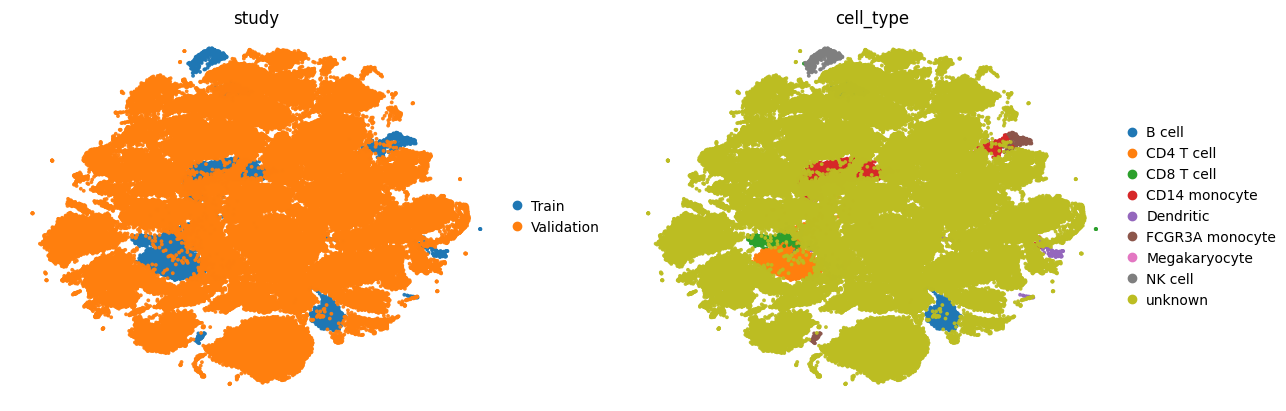

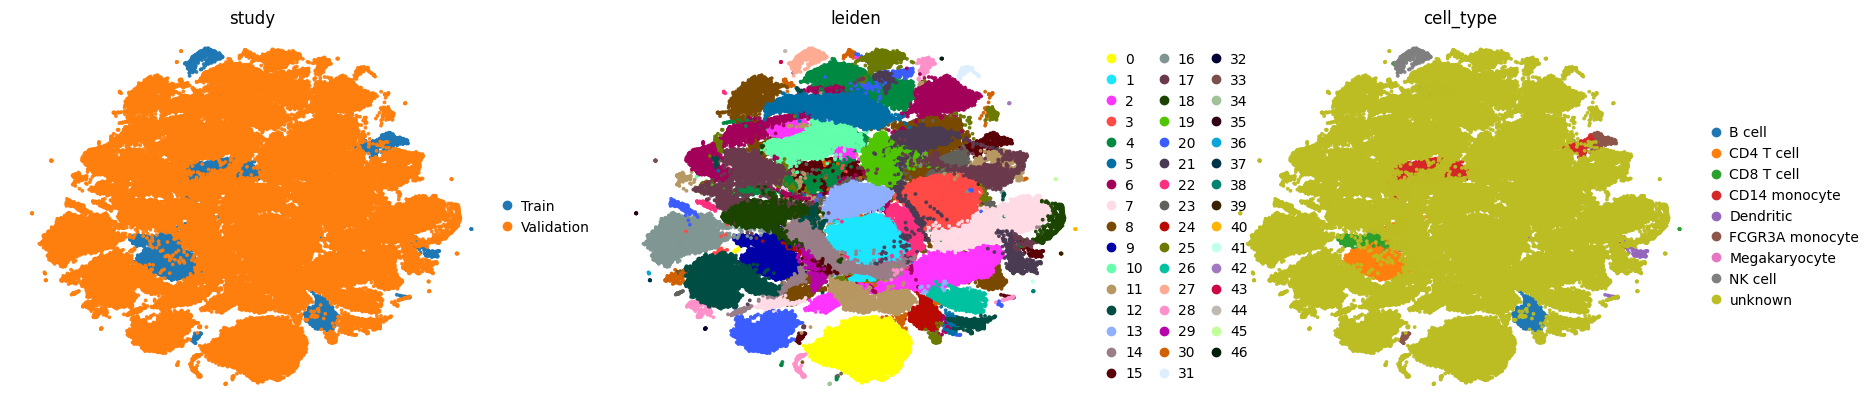

Cluster annotations (from Train cells): {'9': 'CD4 T cell', '15': 'CD14 monocyte', '27': 'NK cell', '24': 'B cell', '6': 'Megakaryocyte', '14': 'CD4 T cell', '29': 'NK cell', '11': 'CD4 T cell', '23': 'CD4 T cell', '18': 'CD4 T cell', '13': 'CD4 T cell', '8': 'CD4 T cell', '4': 'CD4 T cell', '17': 'CD4 T cell', '40': 'CD8 T cell', '0': 'Unknown', '30': 'Unknown', '41': 'Unknown', '16': 'Unknown', '3': 'Unknown', '10': 'Unknown', '42': 'Unknown', '5': 'Unknown', '34': 'Unknown', '25': 'Unknown', '7': 'Unknown', '20': 'Unknown', '28': 'Unknown', '12': 'Unknown', '2': 'Unknown', '37': 'Unknown', '43': 'Unknown', '32': 'Unknown', '33': 'Unknown', '44': 'Unknown', '38': 'Unknown', '36': 'Unknown', '39': 'Unknown', '35': 'Unknown', '45': 'Unknown', '26': 'Unknown', '1': 'Unknown', '22': 'Unknown', '31': 'Unknown', '21': 'Unknown', '19': 'Unknown', '46': 'Unknown'}


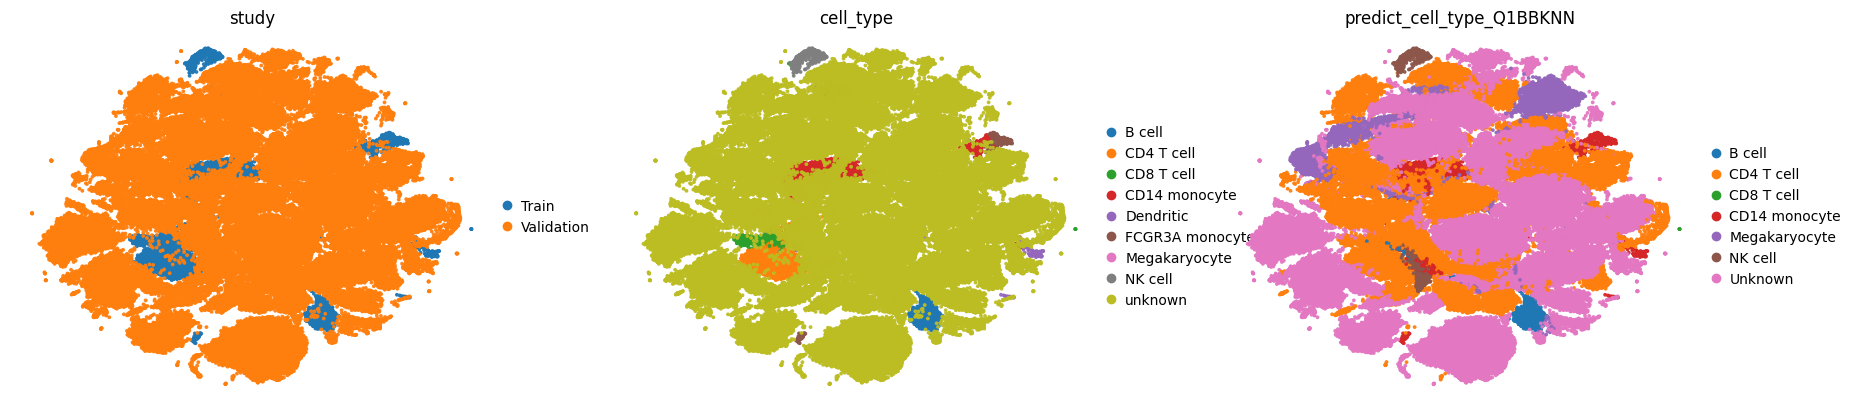

/Users/apple/opt/miniconda3/envs/stem_cell/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/apple/opt/miniconda3/envs/stem_cell/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/apple/opt/miniconda3/envs/stem_cell/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

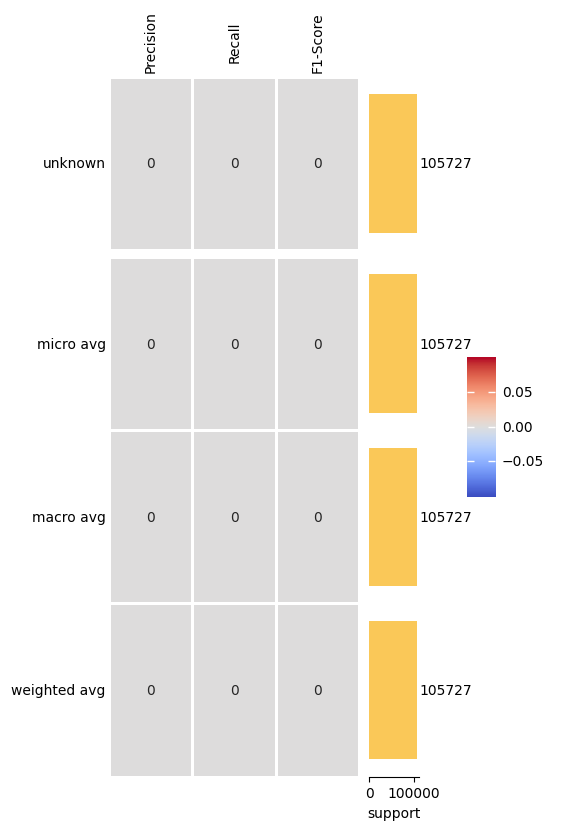

In [98]:
# Install BBKNN
#!pip install bbknn

# Labelling the training and validation datasets with a 'study' identifier

# Concatenate datasets


# Filtering: remove genes not expressed in at least 3 cells
sc.pp.filter_genes(adComb2, min_cells=3)
adComb2.layers['counts'] = adComb2.X.copy()

# Normalization for easier comparison and log-transformation to reduce skew
sc.pp.normalize_total(adComb2)
sc.pp.log1p(adComb2)
# Identify highly variable genes and accounting for batch effects
sc.pp.highly_variable_genes(adComb2, n_top_genes=2000, flavor="cell_ranger", batch_key=batch_key)

# Let dataset only include HVGs
adata_hvg = adComb2[:,adComb2.var["highly_variable"]].copy()
# PCA for dimensionality reduction
sc.pp.pca(adata_hvg)
# Apply BBKNN to correct for batch effects based on 'study'
sc.external.pp.bbknn(adata_hvg, batch_key=batch_key)
adata_hvg

# Visualize UMAP embedding
sc.tl.umap(adata_hvg)
sc.pl.umap(adata_hvg, color=['study', 'cell_type'], size=30, alpha=.95,frameon=False)

# Clustering and visualization using Leiden (same as manual annotation)
sc.tl.leiden(adata_hvg, resolution=0.5)
sc.pl.umap(adata_hvg, color=['study', 'leiden', 'cell_type'], size=30, alpha=0.95, frameon=False)

# Define a function to annotate each cluster based on the majority label from training cells
def annotate_clusters(adata, cluster_key='leiden', ref_key='cell_type', study_key='study'):
    cluster_labels = {}
    for cl in adata.obs[cluster_key].unique():
        # Subset the dataset to only include cells in the current cluster
        cluster_cells = adata[adata.obs[cluster_key] == cl]
        # Further subset cells to only include ones from the training dataset
        ref_cells = cluster_cells[cluster_cells.obs[study_key] == 'Train']
        # Consider only training cells to determine the reference label
        if ref_cells.n_obs > 0:
            # Assign label based on the most frequent cell type label
            majority_label = ref_cells.obs[ref_key].value_counts().idxmax()
        # If the cluster contains no training cells, label the cluster as 'Unknown'.
        else:
            majority_label = 'Unknown'
        cluster_labels[cl] = majority_label
    # return assigned cell type label
    return cluster_labels

# Get cluster annotations from training cells
cluster_annotation = annotate_clusters(adata_hvg, cluster_key='leiden', ref_key='cell_type', study_key='study')
print("Cluster annotations (from Train cells):", cluster_annotation)
# Calling function above: assign predicted cell type to every cell based on its cluster's majority cell type
adata_hvg.obs['predict_cell_type_Q1BBKNN'] = adata_hvg.obs['leiden'].map(cluster_annotation)

# Visualize UMAP
sc.pl.umap(adata_hvg, color=['study', 'cell_type', 'predict_cell_type_Q1BBKNN'], size=30, alpha=0.95, frameon=False)

# Subset to isolate data from adValidation
val_cells = adata_hvg[adata_hvg.obs['study'] == 'Validation'].copy()

# Quantitative Metric, same as manual annotation
c_report_BBKNN_Q1 = cn.cl.create_classifier_report(val_cells, ground_truth='cell_type', prediction='predict_cell_type_Q1BBKNN')
cn.pl.heatmap_classifier_report(c_report_BBKNN_Q1)

In [110]:
val_cells.obs["predict_cell_type_Q1BBKNN"].value_counts()

predict_cell_type_Q1BBKNN
Unknown          66903
CD4 T cell       32642
Megakaryocyte     5458
NK cell            459
CD14 monocyte      141
B cell             124
Name: count, dtype: int64

In [114]:
labeled_adata = gene_info(adata=val_cells, adata_path=None)

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Querying 2000 genes from mygene.info...


35 input query terms found dup hits:	[('TNFRSF14-AS1', 3), ('LINC02574', 2), ('LINC00623', 2), ('DNM3OS', 2), ('MIR29B2CHG', 2), ('LINC01


                 gene_name chromosome  start  end
SAMD11              SAMD11       None    NaN  NaN
HES4                  HES4       None    NaN  NaN
TNFRSF18          TNFRSF18       None    NaN  NaN
TNFRSF4            TNFRSF4       None    NaN  NaN
INTS11              INTS11       None    NaN  NaN
MXRA8                MXRA8       None    NaN  NaN
MMP23B              MMP23B       None    NaN  NaN
TNFRSF14-AS1  TNFRSF14-AS1       None    NaN  NaN
PRDM16              PRDM16       None    NaN  NaN
CCDC27              CCDC27       None    NaN  NaN
Missing values: chromosome    1899
start         1899
end           1899
dtype: int64
chromosome    0
start         0
end           0
dtype: int64


In [120]:
labeled_adata.obs["cell_type"] = labeled_adata.obs["predict_cell_type_Q1BBKNN"]
labeled_adata.obs["cell_type"].value_counts()

cell_type
Unknown          66903
CD4 T cell       32642
Megakaryocyte     5458
NK cell            459
CD14 monocyte      141
B cell             124
Name: count, dtype: int64

In [121]:
labeled_adata = infer_cnas_from_scrna(labeled_adata)

/Users/apple/Documents/GitHub/CNA_tool/tests/../src/cna_tool/infer.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  largest_group = adata.obs.groupby('cell_type').size().idxmax()


[info] No control mask provided. Using largest cluster ('Unknown') as control.


In [126]:
labeled_adata.obs['cna_profile'].unique()[-10:]

array(['10:1159768-133231558(gain);11:289126-70436584(gain);11:102047437-134152001(gain);13:20728731-113816995(gain);17:46558830-59401729(gain);2:31234152-31269451(gain);2:33436324-33586669(gain);2:71453561-85582031(gain);2:86815339-216664436(gain);20:1629152-16053197(gain);20:23045633-31606515(gain);3:3799431-52524495(gain);3:55465715-61251459(gain);3:69168782-109118134(gain);5:7289644-178126081(gain);6:85449584-170306565(gain);7:150625375-150801360(gain);8:489803-20183206(gain);8:38269704-38382272(gain);8:107899316-144475849(gain);9:98943179-121332843(gain);9:124517275-124771311(gain);9:128552558-136672678(gain);9:136992422-136993984(gain);X:320990-78963727(gain);X:96684712-102155977(gain);X:103356489-103378164(gain)',
       '17:46558830-59401729(gain);2:71453561-85582031(gain);2:86815339-216664436(gain);22:17084954-22906803(gain);3:55465715-61251459(gain);5:7289644-178126081(gain);8:38269704-38382272(gain);9:124517275-124771311(gain);9:136992422-136993984(gain);X:320990-78963727(ga

# cell type using ml

In [132]:
adTrain.obs['cell_type'] 

AAACCCAAGCGCCCAT-1       CD4 T cell
AAACCCAAGGTTCCGC-1        Dendritic
AAACCCACAGAGTTGG-1    CD14 monocyte
AAACCCACAGGTATGG-1          NK cell
AAACCCACATAGTCAC-1           B cell
                          ...      
TTTGTTGGTGCGTCGT-1       CD4 T cell
TTTGTTGGTGTCATGT-1    CD14 monocyte
TTTGTTGGTTTGAACC-1       CD8 T cell
TTTGTTGTCCAAGCCG-1       CD4 T cell
TTTGTTGTCTTACTGT-1       CD4 T cell
Name: cell_type, Length: 10309, dtype: category
Categories (8, object): ['B cell', 'CD14 monocyte', 'CD4 T cell', 'CD8 T cell', 'Dendritic', 'FCGR3A monocyte', 'Megakaryocyte', 'NK cell']

In [133]:
# Install required packages if not already installed
#!pip install scanpy scclassify

import scanpy as sc
#import scclassify as cn
import pandas as pd
import matplotlib.pyplot as plt

# Copy and align genes
adRef = adTrain.copy()
adQuery = adValidation.copy()
cn.ut.limit_anndata_to_common_genes([adRef, adQuery])

# Train the classifier on the reference
sc.pp.highly_variable_genes(adRef, n_top_genes=3000, flavor='seurat_v3')
sc.pp.normalize_total(adRef)
sc.pp.log1p(adRef)

clf = cn.cl.train_classifier(
    adRef,
    #groupby='cell_type',
    nRand=30,
    nTopGenes=30,
    nTopGenePairs=40,
    n_comps=30
)

# Predict the cell types of adata3
cn.cl.classify_anndata(adQuery, clf)

# Visualize the results
sc.pp.neighbors(adQuery, n_neighbors=10, n_pcs=30)
sc.tl.umap(adQuery)
sc.pl.umap(adQuery, color=['SCN_class_argmax', 'condition'], size=50, alpha=0.95)

# Composition plot
def plot_condition_cell_composition(ad, condition_col='condition', cell_type_col='SCN_class_argmax'):
    df = ad.obs[[condition_col, cell_type_col]].copy()
    counts = df.groupby(condition_col)[cell_type_col].value_counts().unstack(fill_value=0)
    proportions = counts.div(counts.sum(axis=1), axis=0) * 100
    ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')
    plt.ylabel('Percentage')
    plt.xlabel('Condition')
    plt.title('Predicted Cell Type Composition by Condition')
    plt.legend(title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    return proportions

# Run the composition plot
plot_condition_cell_composition(adQuery)

TypeError: train_classifier() missing 1 required positional argument: 'dLevel'

# infer CNA

In [10]:
adata = infer_cnas_from_scrna(adata)

/Users/apple/Documents/GitHub/CNA_tool/tests/../src/cna_tool/infer.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  largest_group = adata.obs.groupby('cell_type').size().idxmax()


[info] No control mask provided. Using largest cluster ('CD4 T cell') as control.


/Users/apple/Documents/GitHub/CNA_tool/tests/../src/cna_tool/utils.py:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for chrom, sub in var.groupby('chromosome'):


In [11]:
adata6.obs

,sample
AAACCTGAGAATTGTG-1_GSM3814885_day0,GSM3814885_day0
AAACCTGAGACAATAC-1_GSM3814885_day0,GSM3814885_day0
AAACCTGAGACTACAA-1_GSM3814885_day0,GSM3814885_day0
AAACCTGAGACTTTCG-1_GSM3814885_day0,GSM3814885_day0
AAACCTGAGGCGTACA-1_GSM3814885_day0,GSM3814885_day0
...,...
TTTGTCACACATCCAA-1_GSM3814900_huvec,GSM3814900_huvec
TTTGTCACATGCAACT-1_GSM3814900_huvec,GSM3814900_huvec
TTTGTCAGTTGATTGC-1_GSM3814900_huvec,GSM3814900_huvec
TTTGTCATCTAACTCT-1_GSM3814900_huvec,GSM3814900_huvec
